## Problem 3.2 - Ridge vs. LASSO

In [56]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split

### a) Solve minimization problem empirically

In [29]:
# defining lambda and the x and y values
lamda = 1
x = np.linspace(-1, 1, 101)
y_values = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]

In [30]:
# solve the two minimization problems for ridge and lasso regression empirically
solutions_1 = []
solutions_2 = []

for y in y_values:
    # arggmin of (y-x)^2 + lambda * x^2  (Ridge)
    idx_1 = np.argmin((y - x) ** 2 + lamda * x ** 2)
    solutions_1.append(x[idx_1])

    # arggmin of (y-x)^2 + lambda * |x|  (Lasso)
    idx_2 = np.argmin((y - x) ** 2 + lamda * np.abs(x))
    solutions_2.append(x[idx_2])

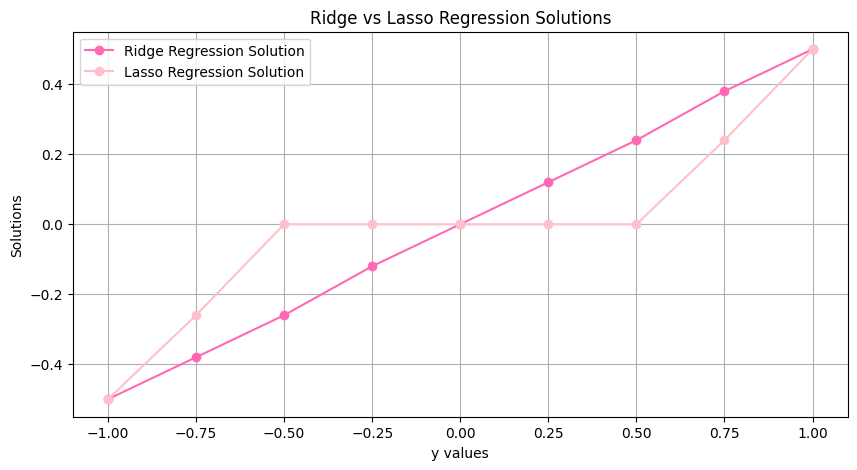

In [31]:
# plot the solution depending on y for both methods

plt.figure(figsize=(10, 5))
plt.plot(y_values, solutions_1, label = 'Ridge Regression Solution', marker = 'o', color = 'hotpink')
plt.plot(y_values, solutions_2, label = 'Lasso Regression Solution', marker = 'o', color = 'pink')
plt.xlabel('y values')
plt.ylabel('Solutions')
plt.title('Ridge vs Lasso Regression Solutions')
plt.legend()
plt.grid()
plt.show()


### b) Ridge and LASSO on breast cancer dataset

In [32]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### (i) Ridge Regression - scores

In [51]:
# printing the scores for Ridge Regression (inspired by Guido/Müller)
lambdas = list(np.power(10.0, np.arange(-6, 2)))
for l in lambdas:
    ridge = Ridge(alpha = l, fit_intercept = False).fit(X_train, y_train)
    print("Ridge Regression for lambda = {:.0e}:".format(l))
    print("Training set score: {}".format(ridge.score(X_train, y_train)))
    print("Test set score: {}\n".format(l, ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Ridge Regression for lambda = 1e-06:
Training set score: 0.757491089241121
Test set score: 1e-06

Ridge Regression for lambda = 1e-05:
Training set score: 0.7574899464207205
Test set score: 1e-05

Ridge Regression for lambda = 1e-04:
Training set score: 0.7574010790116863
Test set score: 0.0001

Ridge Regression for lambda = 1e-03:
Training set score: 0.7545785220158949
Test set score: 0.001

Ridge Regression for lambda = 1e-02:
Training set score: 0.7389459963599623
Test set score: 0.01

Ridge Regression for lambda = 1e-01:
Training set score: 0.7179212646194788
Test set score: 0.1

Ridge Regression for lambda = 1e+00:
Training set score: 0.6774420612877059
Test set score: 1.0

Ridge Regression for lambda = 1e+01:
Training set score: 0.6360471897358837
Test set score: 10.0



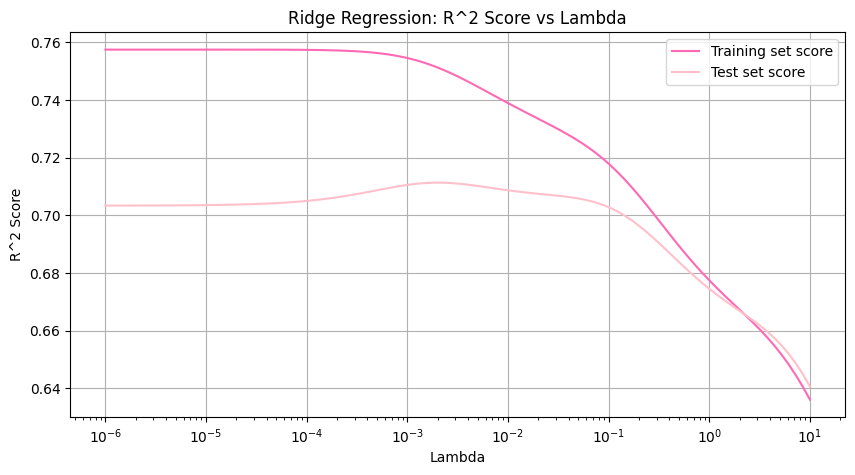

In [46]:
# testing different lambdas for Ridge Regression and plot scores 
lambdas = np.power(10, np.linspace(-6, 1, 100))
train_scores = []
test_scores = []
for l in lambdas:
    ridge = Ridge(alpha = l, fit_intercept = False).fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test)) 

plt.figure(figsize=(10, 5))
plt.semilogx(lambdas, train_scores, label = 'Training set score', color = 'hotpink')
plt.semilogx(lambdas, test_scores, label = 'Test set score', color = 'pink')
plt.xlabel('Lambda')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: R^2 Score vs Lambda')
plt.legend()
plt.grid()
plt.show() 


#### (ii) LASSO Regression - scores

In [53]:
lambdas = lambdas = list(np.power(10.0, np.arange(-6, 2)))
for l in lambdas:
    lasso = Lasso(alpha = l, fit_intercept = False).fit(X_train, y_train)
    print("Ridge Regression for lambda = {:.0e}:".format(l))
    print("Training set score: {}".format(lasso.score(X_train, y_train)))
    print("Test set score: {}\n".format(l, lasso.score(X_train, y_train), lasso.score(X_test, y_test)))

Ridge Regression for lambda = 1e-06:
Training set score: 0.750099758875344
Test set score: 1e-06

Ridge Regression for lambda = 1e-05:
Training set score: 0.7498531606031189
Test set score: 1e-05

Ridge Regression for lambda = 1e-04:
Training set score: 0.7358299427932846
Test set score: 0.0001

Ridge Regression for lambda = 1e-03:
Training set score: 0.6551256757304178
Test set score: 0.001

Ridge Regression for lambda = 1e-02:
Training set score: 0.5780647684163476
Test set score: 0.01

Ridge Regression for lambda = 1e-01:
Training set score: 0.4642096043899294
Test set score: 0.1

Ridge Regression for lambda = 1e+00:
Training set score: 0.3623049424178334
Test set score: 1.0

Ridge Regression for lambda = 1e+01:
Training set score: -0.2502820907418679
Test set score: 10.0



c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+01, tolerance: 2.860e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+01, tolerance: 2.860e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+01, tolerance: 1.062e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+01, tolerance: 1.062e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

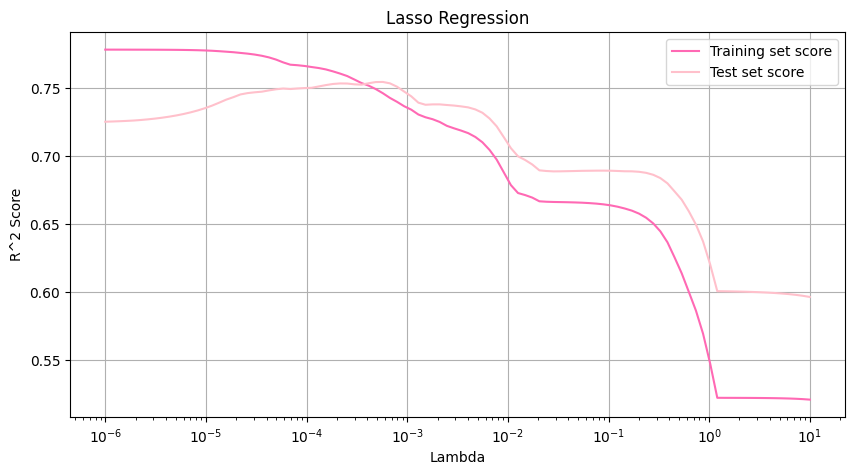

In [48]:
lambdas = np.power(10,np.linspace(-6,1,100))
train_scores = []
test_scores = []
for l in lambdas:
    lasso = Lasso(l).fit(X_train, y_train)
    train_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.semilogx(lambdas, train_scores, label = 'Training set score', color = 'hotpink')
plt.semilogx(lambdas, test_scores, label = 'Test set score', color = 'pink')
plt.xlabel('Lambda')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression')
plt.legend()
plt.grid()
plt.show()

#### (iii) Ridge Regression

In [54]:
ridge = Ridge(alpha = 1, fit_intercept = False).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.67
Training set score: 0.72
Test set score: 0.74
Training set score: 0.76
Test set score: 0.76


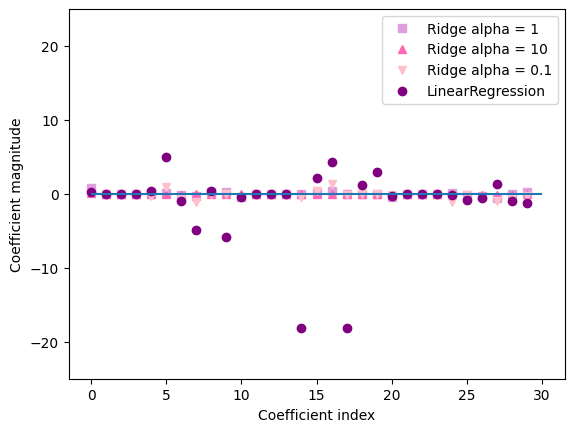

In [58]:
lr = LinearRegression().fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1", color = 'plum')
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10", color = 'hotpink')
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1", color = 'pink')

plt.plot(lr.coef_, 'o', label = "LinearRegression", color = 'purple')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()